# Lab 2 - BFS

Objective: find the way out from the maze using the **breadth-first search** algorithm.

Problem:
* The maze is represented by a grid. The 'X' character stands for a wall, while the space character is a traversable cell.
* A grid can be seen as a graph. Each position in the grid correspond to a node in the graph.
* The adjacent nodes are the adjacent cells in the 4 cardinal directions (i.e. no diagonal movement allowed)

Task:
* You are provided with the incomplete Maze class and an empty BFS function. Complete the functions and run the cells below.

Once completed the required methods, the execution of the cells will show the agent moving from the initial position to the exit of the maze.


In [ ]:
# the grid is defined as a list of strings, each having 20 characters

g = ["XXXXXXXXXXXXXXXXXXXX",
     "X     X    X       X",
     "X XXXXX XXXX XXX XXX",
     "X       X      X X X",
     "X XXXXXXXXXXXX X X X",
     "X X   X        X X X",
     "X XXX XXXXXX XXXXX X",
     "X XXX    X X X     X",
     "X    XXX       XXXXX",
     "X XXX   XXXXXX     X",
     "X   XXX X X    X X X",
     "XXX XXX X X XXXX X X",
     "X     X X   XX X X X",
     "XXXXX     XXXX X XXX",
     "X     X XXX    X   X",
     "X XXXXX X XXXX XXX X",
     "X X     X  X X     X",
     "X X XXXXXX X XXXXX X",
     "X X                X",
     "XXXXXXXXXXXXXXXXXX X"]

## Complete the Maze class
The `moves(self, loc)` method should look up in the grid field if there are any possible moves in the 4 cardinal directions. The starting position $(x,y)$ is provided by `loc`.

In [ ]:
class Maze:
    """A maze environment."""

    def __init__(self, grid):
        self.grid = grid

    def moves(self, loc):
        """Return a list of possible moves given the current agent location."""
        pass

    def walls(self):
        """Return a list of all states that are not allowed
         (i.e. each cell that makes up the wall of the maze) """
        pass

In [ ]:
#@title Solution

class Maze:
    """A maze environment."""

    def __init__(self, grid):
        self.grid = grid

    def moves(self, loc):
        """Return a list of possible moves given the current agent location."""

        possible_moves = []
        r, c = loc  # a state has a row and a column

        # check if the location is free
        if self.grid[r][c+1] != 'X':
            possible_moves.append((r, c+1))
        if self.grid[r][c-1] != 'X':
            possible_moves.append((r, c-1))
        if self.grid[r+1][c] != 'X':
            possible_moves.append((r+1, c))
        if self.grid[r-1][c] != 'X':
            possible_moves.append((r-1, c))
            
        return possible_moves
    
    def walls(self):
        return [(i,j) for i, row in enumerate(self.grid) for j, cell in enumerate(row) if cell=='X']

## Run the "bad" algorithm
As soon as you have correctly completed the Maze class, you can run the following example.

* Without running it, can you tell how the `bad` function works? Can this agent find an (optimal) path to the exit?
* Try to run it. Does your agent avoid moving into a wall? If not, check the previous exercise again.
* How could you improve this algorithm? Are there any additional assumption you need to make?

In [ ]:
def bad(maze, start, goal):
    import random
    loc = start
    path = []
    possible_moves = maze.moves(loc)

    while possible_moves and len(path) < 100 and not loc == goal:
        possible_moves = maze.moves(loc)
        if possible_moves:
            loc = random.choice(possible_moves)
            path.append(loc)
    return path

In [ ]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

# needed to animate in a jupyter environment
rc('animation', html='html5')

# used to produce a short animation
def animate(maze, start, goal, alg=bad, interval=100, show_last=10000):
    fig, ax = plt.subplots()

    size = 100  # marker size

    # plot walls using squares
    w = np.array(maze.walls())
    assert len(w.shape) == 2, "Check the Maze.walls() method."
    assert w.shape[1] == 2, "Check the Maze.walls() method."

    plt_walls = plt.scatter(w[:,0], w[:,1], s=size, marker='s')

    # plot the goal cell
    plt_goal = plt.scatter([goal[0]], [goal[1]], s=size * 0.75, c='green', alpha=0.5)

    # plot the current position of the agent
    plt_agent = plt.scatter([start[0]], [start[1]], s=size, color='red')

    # track the previous positions of the agent
    history_x, history_y = [start[0]], [start[1]]

    # plot the path of the agent
    plt_path, = plt.plot(history_x, history_y, 'o-', color='orange')

    def init():
        # set a good aspect ratio
        ax.set_ylim(-1, 20)
        ax.set_aspect('equal')

        # plot all the initial components
        return plt_path, plt_agent, plt_walls, plt_goal

    def update(frame):
        # for each frame
        history_x.append(frame[0])
        history_y.append(frame[1])
        # update the current path
        plt_path.set_data(history_x[-show_last:], history_y[-show_last:])
        # update the agent position
        plt_agent.set_offsets(frame)

        # plot the path and the agent
        return plt_path, plt_agent

    # apply the algorithm chosen
    path = alg(maze, start, goal)

    # show the path
    print(path)
    print("the path found has", len(path), "steps")

    # check that the path has no invalid moves
    assert all([step not in maze.walls() for step in path]), "An invalid move was permitted. check the Maze.move(loc) method."

    # produce a short animation
    return FuncAnimation(fig, update, frames=path,
                        init_func=init, blit=True, interval=interval)


[(1, 2), (1, 1), (2, 1), (3, 1), (2, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 4), (1, 5), (1, 4), (1, 3), (1, 2), (1, 3), (1, 2), (1, 1), (2, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 1), (4, 1), (3, 1), (2, 1), (1, 1), (1, 2), (1, 3), (1, 2), (1, 1), (2, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (4, 1), (3, 1), (4, 1), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 6), (3, 5), (3, 6), (3, 7), (2, 7), (1, 7), (1, 8), (1, 7), (2, 7), (3, 7), (3, 6), (3, 7), (2, 7), (1, 7), (1, 8), (1, 9), (1, 8), (1, 9), (1, 8), (1, 7), (2, 7), (3, 7), (2, 7), (3, 7), (2, 7), (1, 7), (1, 8), (1, 7), (2, 7), (1, 7), (2, 7), (1, 7), (1, 8), (1, 9), (1, 8), (1, 9), (1, 8), (1, 7), (1, 8), (1, 7), (1, 8), (1, 9), (1, 8), (1, 7), (1, 8), (1, 9), (1, 8), (1, 9), (1, 10), (1, 9), (1, 10), (1, 9)]
the path found has 100 steps


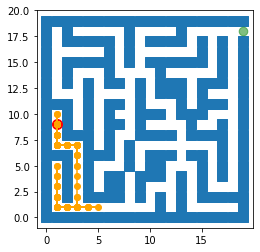

In [ ]:
maze = Maze(g)
animate(maze, (1,1), (19,18), alg=bad, interval=100)

## BFS: review

### Uninformed search
Only the information provided by the problem definition are available for the search

### Breadth-first search
* Define the state (or node) in your problem. The state must allow indexing (i.e. `x[0]` and `x[1]`) to retrieve the row and the column of the state. Keep it simple.
* Define the expansion method `maze.moves(loc)`. It should contain all the possible movements from the agent location `loc` in an adjacent cell.
* The frontier is the set of available nodes not expanded yet.
* Frontier is of type FIFO (first-in-first-out): during expansion, expand the shallowest nodes first (tip: `mylist.pop(0)`).
* Every time you generate a new node, check if it is the goal of your problem (goal-check).

Pseudocode of BFS:
```
bfs(start vertex, goal vertex)
  make frontier an empty queue
  enqueue start onto frontier
  until frontier is empty
    dequeue node off frontier
    for each undiscovered adjacent_node of node
      enqueue adjacent_node onto frontier
      stop if adjacent_node is the goal
```

* The function gets:
 * a maze object, as defined above;
 * a start state;
 * a goal state.

* The function has to return:
 * `None` if the maze has no solution;
 * otherwise, a sequence that contains all the states the agent need to traverse to get from the start state to the goal state.


In [ ]:
def bfs(maze, start, goal):
    pass

In [ ]:
#@title Solution
def bfs(maze, start, goal):
    """Return an ordered list of moves to get the maze to match the goal."""

    # use two lists
    frontier = [start]
    visited = []

    # track all the paths with a dictionary
    path = {start : []}

    iterations = 1
    while frontier:
        loc = frontier.pop(0)  # fifo queue: gets from the beginning

        # Expand the search by moving the agent.
        for move in maze.moves(loc):
            # check if the move was undiscovered so far
            # we ignore loops by checking that the move is not already in frontier
            if move not in visited and move not in frontier:
                frontier.append(move)  # fifo queue: adds at the end
                visited.append(move)
                path[move] = path[loc]+[move]

            if move == goal:
                print("bfs took", iterations, "iterations")
                print("the optimal path length is:", len(path[loc])+1)
                return path[loc]+[move]

        iterations = iterations + 1
    return None

bfs took 153 iterations
the optimal path length is: 43
[(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (10, 2), (10, 3), (11, 3), (12, 3), (12, 4), (12, 5), (13, 5), (13, 6), (13, 7), (13, 8), (13, 9), (12, 9), (12, 10), (12, 11), (11, 11), (10, 11), (10, 12), (10, 13), (10, 14), (9, 14), (9, 15), (9, 16), (10, 16), (11, 16), (12, 16), (13, 16), (14, 16), (14, 17), (14, 18), (15, 18), (16, 18), (17, 18), (18, 18), (19, 18)]
solution found has 43 steps


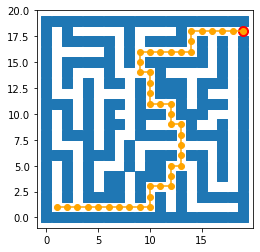

In [ ]:
maze = Maze(g)

animate(maze, (1,1), (19,18), alg=bfs, interval=40)

## Exercise
As done previously for the `bad` function, try to analyze the following algorithm.


* Without running it, can you tell how the `bad2` function works? Can this agent find an (optimal) path to the exit?

* Try to run it.

* How could you improve this algorithm? Are there any additional assumption you need to make?

In [ ]:
def bad2(maze, start, goal):
    import random
    loc = start
    path = []
    possible_moves = maze.moves(loc)

    def get_direction(a, b):
        return a[0]-b[0], a[1]-b[1]

    while possible_moves and len(path) < 200 and not loc == goal:
        possible_moves = maze.moves(loc)
        if len(path) < 2:
            same_direction_move = random.choice(possible_moves)
        else:
            direction = get_direction(path[-1], path[-2])
            same_direction_move = loc[0] + direction[0], loc[1] + direction[1]

        if same_direction_move in possible_moves:
            loc = same_direction_move
        else:
            loc = random.choice(possible_moves)

        path.append(loc)

    return path

[(2, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (10, 2), (10, 3), (11, 3), (12, 3), (12, 4), (12, 5), (12, 4), (12, 3), (12, 2), (12, 1), (12, 2), (12, 3), (12, 4), (12, 5), (13, 5), (14, 5), (14, 4), (14, 3), (14, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (17, 1), (16, 1), (15, 1), (14, 1), (14, 2), (14, 3), (14, 4), (14, 5), (13, 5), (12, 5), (13, 5), (14, 5), (13, 5), (12, 5), (12, 4), (12, 3), (12, 2), (12, 1), (12, 2), (12, 3), (12, 4), (12, 5), (13, 5), (14, 5), (14, 4), (14, 3), (14, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (17, 1), (16, 1), (15, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (17, 1), (16, 

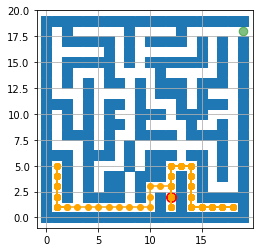

In [ ]:
maze = Maze(g)

animate(maze, (1,1), (19,18), alg=bad2, interval=100)